In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshkapilavai/extrovert-vs-introvert-behavior-data",
  "personality_dataset.csv"
)

# Get dummy variables as False=0 and True=1
dummy_vars = pd.get_dummies(df, dtype=int)
# Drop no categories
dummy_vars = dummy_vars.drop(["Stage_fear_No", "Drained_after_socializing_No"], axis="columns")

/Users/prokope/KState/STAT-705/Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/xj/5m3dhh594lb1gv6r95wws5nm0000gn/T/ipykernel_33156/3663596296.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


## Visualize data

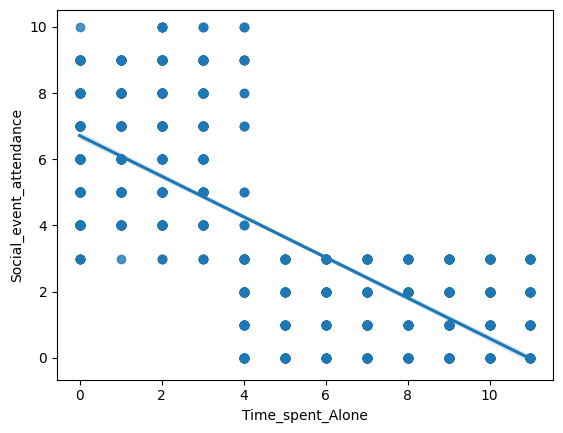

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='Time_spent_Alone', y='Social_event_attendance', data=df)
plt.show()

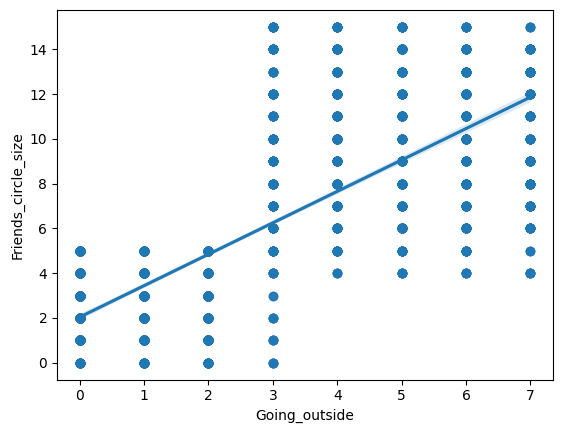

In [4]:
sns.regplot(x='Going_outside', y='Friends_circle_size', data=df)
plt.show()

## Regression Analysis

In [6]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Time_spent_Alone ~ Social_event_attendance', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Time_spent_Alone   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     3221.
Date:                Sun, 29 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:32:56   Log-Likelihood:                -6330.3
No. Observations:                2776   AIC:                         1.266e+04
Df Residuals:                    2774   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.9711      0.076    105.057      0.000       7.822       8.120
Social_event_attendance    -0.8773      0.015    -56.757      0.000      -0.908      -0.847
==============================================================================
Omnibus:                      118.305   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.342
Skew:                           0.174   Prob(JB):                     7.89e-14
Kurtosis:                       2.367   Cond. No.                         8.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""